<a href="https://colab.research.google.com/github/Hamzaahahaa/Banking-Sector-Project-For-Anomoly-Detection-using-ML/blob/main/Banking_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import  OneHotEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
import scipy.sparse
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import sklearn





# Load the dataset
url = '/content/Comprehensive_Banking_Database (1).csv'  # Update this path with the URL of your dataset
data = pd.read_csv(url)
data.head()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1


In [ ]:
# Basic Data Cleaning
# Impute missing values
null_values = data.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
Customer ID                          0
First Name                           0
Last Name                            0
Age                                  0
Gender                               0
Address                              0
City                                 0
Contact Number                       0
Email                                0
Account Type                         0
Account Balance                      0
Date Of Account Opening              0
Last Transaction Date                0
TransactionID                        0
Transaction Date                     0
Transaction Type                     0
Transaction Amount                   0
Account Balance After Transaction    0
Branch ID                            0
Loan ID                              0
Loan Amount                          0
Loan Type                            0
Interest Rate                        0
Loan Term                            0
Approval/Rejection Date             

In [ ]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


<ipython-input-6-8d7877caddc6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data["Anomaly"], palette=("Pastel2"))
<ipython-input-6-8d7877caddc6>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['anomaly', 'normal'])


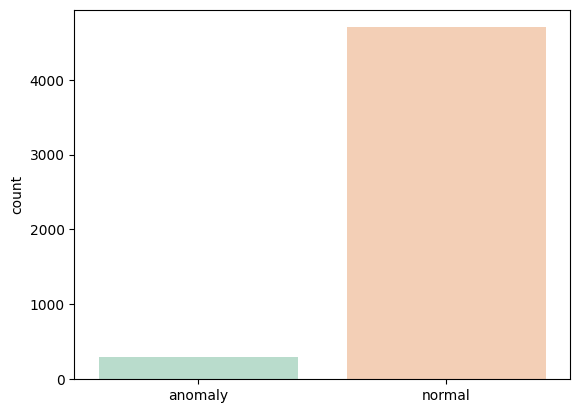

In [ ]:
ax = sns.countplot(x=data["Anomaly"], palette=("Pastel2"))
abs_values = data["Anomaly"].value_counts(ascending=False).values

ax.set_xticklabels(['anomaly', 'normal'])
plt.xlabel(None)
plt.show()

In [ ]:
def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(data)
data.head()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,22,13,45,1,0,13,19458794854,951,0,...,226.22,80,163,8142,1,58,2,1,14,1
1,2,30,40,47,0,1111,21,19458794855,1317,0,...,42.84,87,250,4306,2,209,0,1,323,1
2,3,21,9,25,0,2222,29,19458794856,907,0,...,162.12,29,163,4842,3,362,1,0,214,1
3,4,25,21,52,2,3333,27,19458794857,1086,1,...,216.46,363,37,9463,4,232,0,1,299,1
4,5,27,18,68,2,4444,30,19458794858,1169,1,...,1.29,176,292,2209,5,126,0,1,75,1


In [ ]:
# Apply RobustScaler
scaler = RobustScaler()
data[data.columns.difference(['Anomaly'])] = scaler.fit_transform(data[data.columns.difference(['Anomaly'])])

X = data.drop('Anomaly', axis=1)
Y = data['Anomaly']


# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use sparse=False to return a numpy array
# categorical_columns = X_train.select_dtypes(include=['object']).columns
# test_categorical_columns = X_test.select_dtypes(include=['object']).columns

# # Fit and transform the categorical columns
# X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
# X_test_encoded = encoder.transform(X_test[test_categorical_columns])




# # If there are numeric columns as well, concatenate them with the encoded data
# numeric_columns = X_train.select_dtypes(exclude=['object']).columns
# test_numeric_columns = X_test.select_dtypes(exclude=['object']).columns


# X_train_numeric = X_train[numeric_columns].values  # Ensure this is numeric
# X_test_numeric = X_test[test_numeric_columns].values  # Ensure this is numeric

# # Concatenate numeric and encoded categorical data
# X_train_prepared = np.hstack([X_train_numeric, X_train_encoded])
# X_test_prepared = np.hstack([X_test_numeric, X_test_encoded])

In [ ]:
def print_stats(predictions, X, y, title):
    # Predict the anomalies
    print(f"{title}:")
    print(f"{len(predictions[predictions == -1])} outliers from {len(predictions)}")
    print("-1 is anomaly, 1 is normal")

    print(classification_report(y, predictions))

    conf_matrix = confusion_matrix(y, predictions)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    fig, ax = plt.subplots()
    disp.plot(ax=ax)

    # Customize tick labels
    ax.set_xticklabels(['Anomaly', 'Normal'])  # Custom labels for x-axis
    ax.set_yticklabels(['Anomaly', 'Normal'])  # Custom labels for y-axis
    ax.set_title('Confusion Matrix for ' + title)
    # Display the plot
    plt.show()

IsolationForest (Trained):
200 outliers from 4000
-1 is anomaly, 1 is normal
              precision    recall  f1-score   support

          -1       0.06      0.05      0.05       248
           1       0.94      0.95      0.94      3752

    accuracy                           0.89      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.88      0.89      0.89      4000



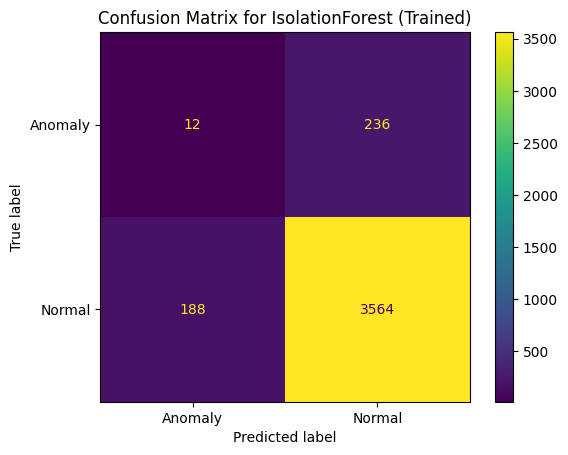

In [ ]:
model = IsolationForest(n_estimators=100, random_state=42, contamination=0.05).fit(X_train)
X_train_prediction = model.predict(X_train)
print_stats(X_train_prediction, X_train, Y_train, "IsolationForest (Trained)")

IsolationForest (Test):
50 outliers from 1000
-1 is anomaly, 1 is normal
              precision    recall  f1-score   support

          -1       0.06      0.06      0.06        52
           1       0.95      0.95      0.95       948

    accuracy                           0.90      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.90      0.90      0.90      1000



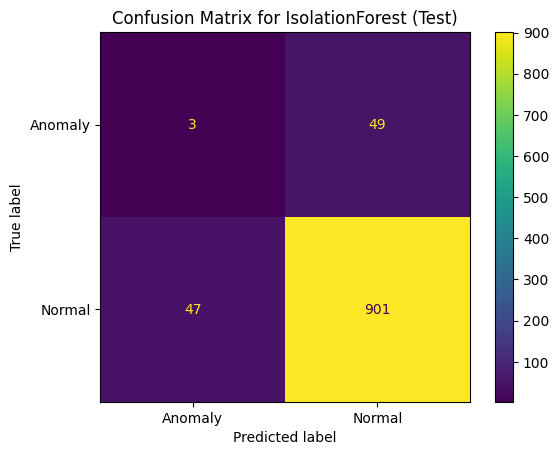

In [ ]:
model = IsolationForest(n_estimators=200, random_state=42, contamination=0.05).fit(X_test)
X_test_prediction = model.predict(X_test)
print_stats(X_test_prediction, X_test, Y_test, "IsolationForest (Test)")

One-class SVM (Trained):
3200 outliers from 4000
-1 is anomaly, 1 is normal
              precision    recall  f1-score   support

          -1       0.06      0.74      0.11       248
           1       0.92      0.20      0.32      3752

    accuracy                           0.23      4000
   macro avg       0.49      0.47      0.22      4000
weighted avg       0.87      0.23      0.31      4000



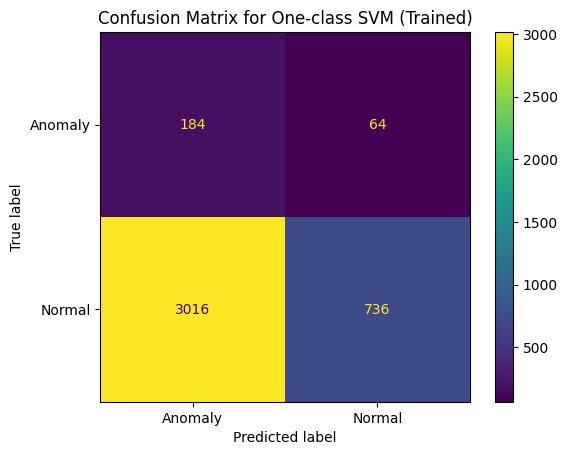

In [ ]:
model = OneClassSVM(kernel='poly', nu=0.8, gamma='scale').fit(X_train)
predictions = model.predict(X_train)
print_stats(predictions, X_train, Y_train, "One-class SVM (Trained)")

One-class SVM (test):
336 outliers from 1000
-1 is anomaly, 1 is normal
              precision    recall  f1-score   support

          -1       0.05      0.33      0.09        52
           1       0.95      0.66      0.78       948

    accuracy                           0.65      1000
   macro avg       0.50      0.50      0.43      1000
weighted avg       0.90      0.65      0.74      1000



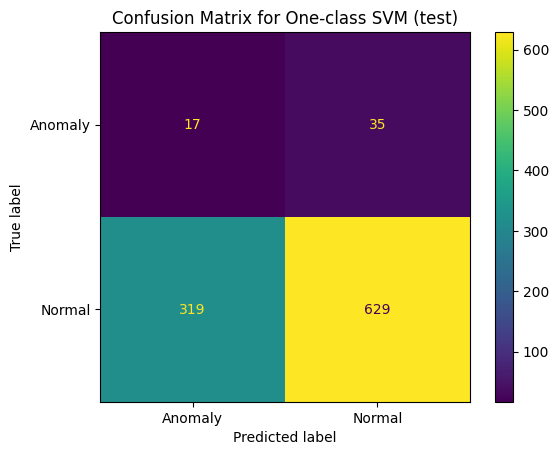

In [ ]:
model = OneClassSVM(kernel='poly', nu=0.2, gamma='scale').fit(X_test)
predictions = model.predict(X_test)
print_stats(predictions, X_test, Y_test, "One-class SVM (test)")

Local Outlier Factor (Trained):
0 outliers from 4000
-1 is anomaly, 1 is normal
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       248
           1       0.94      1.00      0.97      3752

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


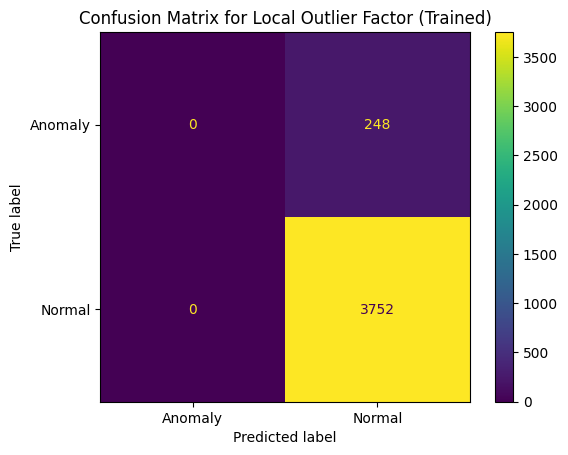

In [ ]:
predictions = LocalOutlierFactor(n_neighbors=20, algorithm='auto').fit_predict(X_train)
print_stats(predictions, X_train, Y_train, "Local Outlier Factor (Trained)")


Local Outlier Factor (test):
0 outliers from 1000
-1 is anomaly, 1 is normal
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        52
           1       0.95      1.00      0.97       948

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.92      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


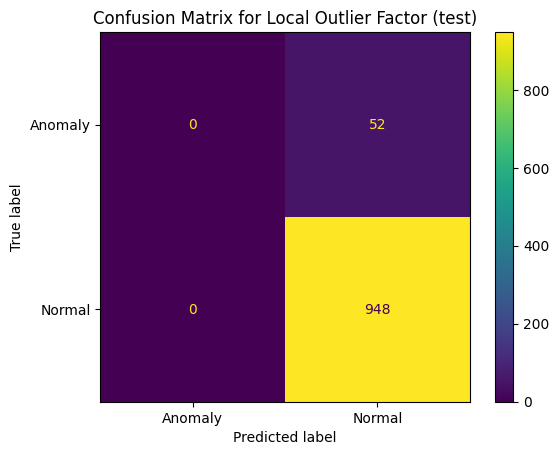

In [ ]:
predictions = LocalOutlierFactor(n_neighbors=20, algorithm='auto').fit_predict(X_test)
print_stats(predictions, X_test, Y_test, "Local Outlier Factor (test)")

In [ ]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=2)
predictions = clusterer.fit_predict(X_train)

# Convert predictions to binary format
# Assuming -1 as outliers (anomaly = -1) and all other labels as normal (normal = 1)
binary_predictions = np.where(predictions == -1, 1, -1)  # -1 for anomalies, 1 for normals

# Example adjustment, assuming Y_train needs to be binary
# This is just a placeholder; adjust based on your specific scenario
Y_train_binary = np.where(Y_train == 1, 1, -1)  # Adjust 'specific_anomaly_label' as per your data

print(f"hdbscan train:")
print(f"{np.sum(predictions == 1)} outliers from {len(binary_predictions)}")  # Anomalies counted
print("-1 is anomaly, 1 is normal")

print(classification_report(Y_train_binary, binary_predictions))


conf_matrix = confusion_matrix(Y_train_binary, binary_predictions)

    # Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
fig, ax = plt.subplots()
disp.plot(ax=ax)

    # Customize tick labels
ax.set_xticklabels(['Normal', 'Anomaly'])  # Custom labels for x-axis
ax.set_yticklabels(['Normal', 'Anomaly'])  # Custom labels for y-axis
ax.set_title('Confusion Matrix for HDBSCAN (Trained)')
plt.show()

hdbscan train:
3 outliers from 1000
-1 is anomaly, 1 is normal
              precision    recall  f1-score   support

          -1       0.05      0.77      0.10        52
           1       0.95      0.26      0.41       948

    accuracy                           0.29      1000
   macro avg       0.50      0.51      0.25      1000
weighted avg       0.91      0.29      0.39      1000



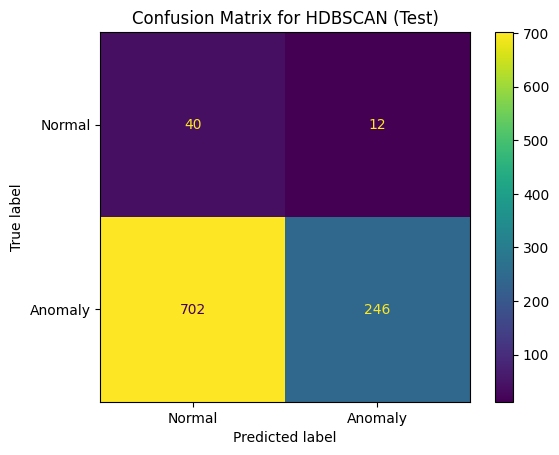

In [ ]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=2)
predictions = clusterer.fit_predict(X_test)

# Convert predictions to binary format
# Assuming -1 as outliers (anomaly = -1) and all other labels as normal (normal = 1)
binary_predictions = np.where(predictions == -1, 1, -1)  # -1 for anomalies, 1 for normals

# Example adjustment, assuming Y_train needs to be binary
# This is just a placeholder; adjust based on your specific scenario
Y_test_binary = np.where(Y_test == 1, 1, -1)  # Adjust 'specific_anomaly_label' as per your data

print(f"hdbscan train:")
print(f"{np.sum(predictions == 1)} outliers from {len(binary_predictions)}")  # Anomalies counted
print("-1 is anomaly, 1 is normal")

print(classification_report(Y_test_binary, binary_predictions))


conf_matrix = confusion_matrix(Y_test_binary, binary_predictions)

    # Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
fig, ax = plt.subplots()
disp.plot(ax=ax)

    # Customize tick labels
ax.set_xticklabels(['Normal', 'Anomaly'])  # Custom labels for x-axis
ax.set_yticklabels(['Normal', 'Anomaly'])  # Custom labels for y-axis
ax.set_title('Confusion Matrix for HDBSCAN (Test)')
plt.show()